# Exploring the IMDb Database

## Introduction
> The Internet Movie Database (IMDb) is an online database containing information and statistics regarding movies, tv shows, directors, actors, and other relevant fields. The IMDb website is popular among the average moviegoer and is usually accessed to check titles ratings. Such title ratings are filtered and weighed in various ways to produce a weighted mean that is displayed for each film, series, and so on. Inputs for these weighted means are derived from user submissions where users rate titles from one to ten. As of June 2021, the database contained some 8 million titles and 10.4 million personal records. For this analysis, the dataset was condensed to only include American titles that were made in the year 2000 and onwards for fast executing query purposes. In this project, we will be exploring the IMDb dataset to understand the relationships between all the different fields. The aim of this project is to 1. Demonstrate my skills in database creation 2.  Demonstrate my skills in querying databases 3. Demonstrate my skills in building visualizations in Tableau. The first part of this project will focus on the creation of the database, while the second part will be centered on answering questions regarding the database. All queries have an accompanying visual that can be found on my public tableau Dashboard: https://public.tableau.com/app/profile/omar.stinner/viz/IMDbDashboard_16383125933070/IMDbDashboard - each visual is titled with its respective question. All the files and scripts used in this analysis are available in my repository.

In [2]:
#Importing the Relevant Libraries and the SQL Engine

import sqlalchemy
sqlalchemy.create_engine("sqlite:///foo.db")
%load_ext sql
%sql sqlite:///final_imdb.db

'Connected: @final_imdb.db'

## Part 1: Database Creation

### Data Source

> The following files, acquired from https://datasets.imdbws.com/, were used to build the IMDb database:
> - name.basics.tsv.gz - Contains name information
> - title.akas.tsv.gz - Contains title regional information
> - title.basics.tsv.gz - Contains title information
> - title.crew.tsv.gz - Contains title crew information
> - title.episode.tsv.gz - Contains title epsiode infromation
> - title.principals.tsv.gz - Continas title principal information
> - title.ratings.tsv.gz - Contains title ratings information

> Relevant data was extracted from these files to create new csv files to populate the tables in the below database schema.

### Selected Database Schema

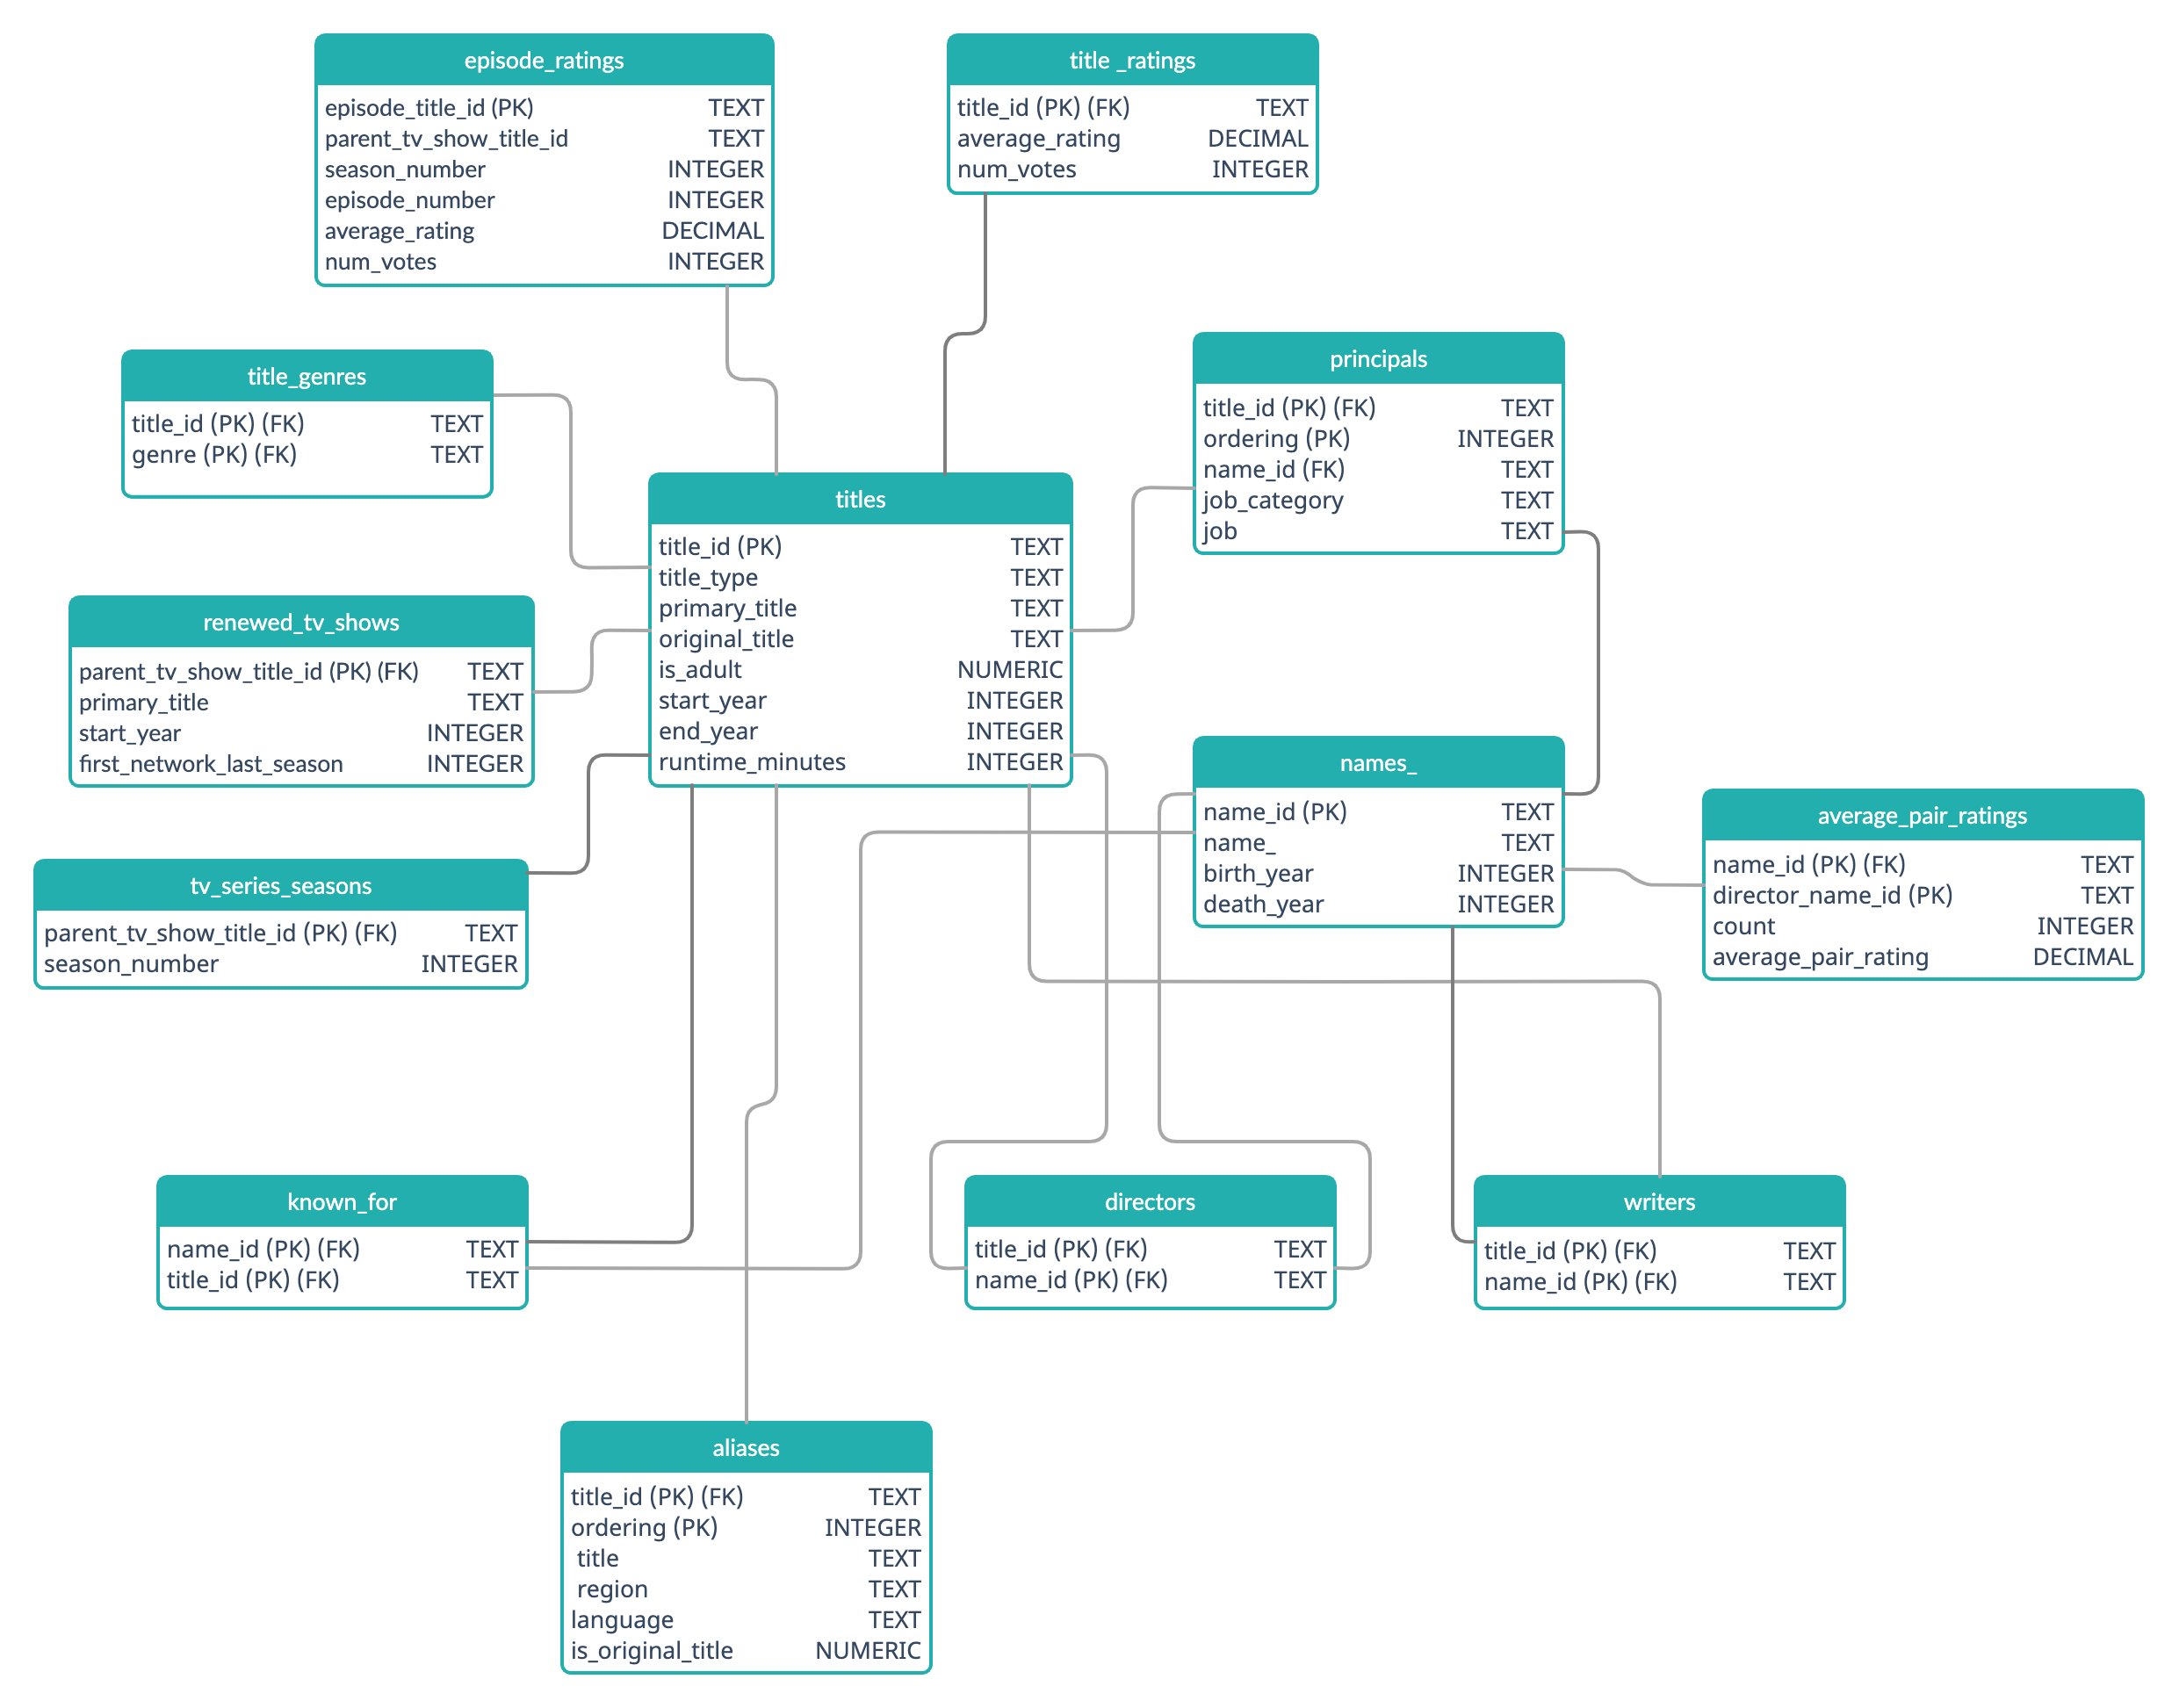

### Creating The Database

In [ ]:
%%sql

-- Drop tables if they exists

DROP TABLE IF EXISTS titles;
DROP TABLE IF EXISTS names_;
DROP TABLE IF EXISTS principals;
DROP TABLE IF EXISTS aliases;
DROP TABLE IF EXISTS average_pair_ratings;
DROP TABLE IF EXISTS directors;
DROP TABLE IF EXISTS episode_ratings;
DROP TABLE IF EXISTS known_for;
DROP TABLE IF EXISTS renewed_tv_shows;
DROP TABLE IF EXISTS title_genres;
DROP TABLE IF EXISTS title_ratings;
DROP TABLE IF EXISTS tv_series_seasons;
DROP TABLE IF EXISTS writers;

-- Creating titles table

CREATE TABLE titles (
    title_id        TEXT    NOT NULL
                            PRIMARY KEY,
    title_type      TEXT,
    primary_title   TEXT,
    original_title  TEXT,
    is_adult        NUMERIC,
    start_year      INTEGER,
    end_year        INTEGER,
    runtime_minutes INTEGER
);

-- Creating names_ table

CREATE TABLE names_ (
    name_id    TEXT    NOT NULL
                       PRIMARY KEY,
    name_      TEXT    NOT NULL,
    birth_year INTEGER,
    death_year INTEGER
);

-- Creating principals table

CREATE TABLE principals (
    title_id     TEXT    NOT NULL
                         REFERENCES titles (title_id),
    ordering     INTEGER NOT NULL,
    name_id      TEXT    NOT NULL
                         REFERENCES names_ (name_id),
    job_category TEXT,
    job          TEXT,
    PRIMARY KEY (
        title_id,
        ordering
    )
);

-- Creating aliases table

CREATE TABLE aliases (
    title_id          TEXT    NOT NULL
                              REFERENCES titles (title_id),
    ordering          INTEGER NOT NULL,
    title             TEXT    NOT NULL,
    region            TEXT,
    language          TEXT,
    is_original_title NUMERIC,
    PRIMARY KEY (
        title_id,
        ordering
    )
);

-- Creating average_pair_ratings table

CREATE TABLE average_pair_ratings (
    name_id             TEXT    REFERENCES names_ (name_id),
    director_name_id    TEXT,
    count               INTEGER,
    average_pair_rating DECIMAL,
    PRIMARY KEY (
        name_id,
        director_name_id
    )
);

-- Creating directors table

CREATE TABLE directors (
    title_id TEXT NOT NULL
                  REFERENCES titles (title_id),
    name_id  TEXT NOT NULL
                  REFERENCES names_ (name_id),
    PRIMARY KEY (
        title_id,
        name_id
    )
);

-- Creating episode_ratings table

CREATE TABLE episode_ratings (
    episode_title_id        TEXT    PRIMARY KEY
                                    REFERENCES titles (title_id),
    parent_tv_show_title_id TEXT    REFERENCES titles (title_id),
    season_number           INTEGER,
    episode_number          INTEGER,
    average_rating          DECIMAL,
    num_votes               INTEGER
);

-- Creating known_for table

CREATE TABLE known_for (
    name_id  TEXT NOT NULL
                  REFERENCES names_ (name_id),
    title_id TEXT NOT NULL
                  REFERENCES titles (title_id),
    PRIMARY KEY (
        name_id,
        title_id
    )
);

-- Creating renewed_tv_shows table

CREATE TABLE renewed_tv_shows (
    parent_tv_show_title_id   TEXT    REFERENCES titles (title_id) 
                                      PRIMARY KEY,
    primary_title             TEXT,
    start_year                INTEGER,
    first_network_last_season INTEGER
);

-- Creating title_genres table

CREATE TABLE title_genres (
    title_id TEXT NOT NULL
                  REFERENCES titles (title_id),
    genre    TEXT NOT NULL,
    PRIMARY KEY (
        title_id,
        genre
    )
);

-- Creating title_ratings table

CREATE TABLE title_ratings (
    title_id       TEXT    NOT NULL
                           PRIMARY KEY
                           REFERENCES titles (title_id),
    average_rating DECIMAL,
    num_votes      INTEGER
);

-- Creating tv_series_seasons table

CREATE TABLE tv_series_seasons (
    parent_tv_show_title_id TEXT    NOT NULL
                                    REFERENCES titles (title_id),
    season_number           INTEGER,
    PRIMARY KEY (
        parent_tv_show_title_id,
        season_number
    )
);

-- Creating writers table

CREATE TABLE writers (
    title_id TEXT NOT NULL
                  REFERENCES titles (title_id),
    name_id  TEXT NOT NULL
                  REFERENCES names_ (name_id),
    PRIMARY KEY (
        title_id,
        name_id
    )
);

### Setting The Indexes

In [ ]:
%%sql

-- Creating indexes for the tables

-- Creating indexes for the aliases table

CREATE INDEX aliases_region_index ON aliases (
    region
);

CREATE INDEX aliases_title_id ON aliases (
    title_id
);

CREATE INDEX aliases_title_id_region_index ON aliases (
    title_id,
    region
);

-- Creating indexes for the episode_ratings table

CREATE INDEX episode_ratings_average_rating_index ON episode_ratings (
    average_rating
);

CREATE INDEX episode_ratings_parent_tv_show_title_id_index ON episode_ratings (
    parent_tv_show_title_id
);

CREATE INDEX episode_ratings_season_number_index ON episode_ratings (
    season_number
);

-- Creating indexes for the principals table

CREATE INDEX principals_job_category_index ON principals (
    job_category
);

CREATE INDEX principals_name_id_index ON principals (
    name_id
);

CREATE INDEX principals_title_id ON principals (
    title_id
);

CREATE INDEX principals_title_id_name_id_job_category_index ON principals (
    title_id,
    name_id,
    job_category
);

-- Creating indexes for the title_ratings table

CREATE INDEX title_ratings_average_rating_index ON title_ratings (
    average_rating
);

CREATE INDEX title_ratings_title_id_average_rating_index ON title_ratings (
    title_id,
    average_rating
);

CREATE INDEX title_ratings_title_id_index ON title_ratings (
    title_id
);

-- Creating indexes for the titles table

CREATE INDEX titles_is_adult_index ON titles (
    is_adult
);

CREATE INDEX titles_title_id_index ON titles (
    title_id
);

CREATE INDEX titles_title_id_is_adult_index ON titles (
    title_id,
    is_adult
);

### Populating The Tables

In [ ]:
%%sql

-- Import data into titles table

.import '| tail -n +2 titles.csv' titles

-- Import data into names_ table

.import '| tail -n +2 names_.csv' names_

-- Import data into principals table

.import '| tail -n +2 principals.csv' principals

-- Import data into aliases table

.import '| tail -n +2 aliases.csv' aliases

-- Import data into average_pair_ratings table

.import '| tail -n +2 average_pair_ratings.csv' average_pair_ratings

-- Import data into directors table

.import '| tail -n +2 directors.csv' directors

-- Import data into episode_ratings table

.import '| tail -n +2 episode_ratings.csv' episode_ratings

-- Import data into known_for table

.import '| tail -n +2 known_for.csv' known_for

-- Import data into renewed_tv_shows table

.import '| tail -n +2 renewed_tv_shows.csv' renewed_tv_shows

-- Import data into title_genres table

.import '| tail -n +2 title_genres,csv' title_genres

-- Import data into title_ratings table

.import '| tail -n +2 title_ratings.csv' title_ratings

-- Import data into tv_series_seasons table

.import '| tail -n +2 tv_series_seasons.csv' tv_series_seasons

-- Import data into writers table

.import '| tail -n +2 writers.csv' writers

## Part 2: Querying the Database to Answer Questions

### Q1: Do the ratings of tv shows worsen as they progress into the second season?

> #### Context
> The first season for many tv shows typically outperforms the second season. The purpose of this analysis is to determine if this notion holds true. We will analyze the percentage change in average overall ratings from season 1 to season 2 for all genres. Only true genre tv shows were selected for this analysis (tv shows with only 1 genre).

In [6]:
%%sql

WITH

--  Selecting Shows that have a season 1 and season 2

season_1_2 AS
(
SELECT tss1.parent_tv_show_title_id,
        CASE
        WHEN (1 IN (SELECT tss2.season_number
                    FROM tv_series_seasons AS tss2
                    WHERE tss1.parent_tv_show_title_id = tss2.parent_tv_show_title_id))
        
        AND 
        
             (2 IN (SELECT tss3.season_number
                    FROM tv_series_seasons AS tss3
                    WHERE tss1.parent_tv_show_title_id = tss3.parent_tv_show_title_id)) THEN "y"
                    
        ELSE "n"
        END AS "s1_s2"
        
FROM tv_series_seasons AS tss1
GROUP BY tss1.parent_tv_show_title_id
HAVING "s1_s2" = "y"
),

-- Gathering all the TV Series and their respective episodes

season_ratings AS
(
SELECT *
FROM season_1_2 AS s12 INNER JOIN episode_ratings AS er ON s12.parent_tv_show_title_id = er.parent_tv_show_title_id
),

-- Filtering again for season 1 and 2, because in the above query after joining the "episode_ratings" table, we lost some episodes and some seasons because ratings weren't available for them

complete_sets AS
(
SELECT sr1.parent_tv_show_title_id,
        CASE
        WHEN (1 IN (SELECT sr2.season_number
                    FROM season_ratings AS sr2
                    WHERE sr1.parent_tv_show_title_id = sr2.parent_tv_show_title_id))
        
        AND 
        
             (2 IN (SELECT sr3.season_number
                    FROM season_ratings AS sr3
                    WHERE sr1.parent_tv_show_title_id = sr3.parent_tv_show_title_id)) THEN "y"
                    
        ELSE "n"
        END AS "s1_s2"
        
FROM season_ratings AS sr1
GROUP BY sr1.parent_tv_show_title_id
),

-- Selecting the rows for seasons 1 and 2 of the remaining TV Series

final_complete_sets AS
(
SELECT *
FROM complete_sets AS cs INNER JOIN episode_ratings AS er ON cs.parent_tv_show_title_id = er.parent_tv_show_title_id
WHERE s1_s2 = "y" AND er.season_number IN (1,2)
),

-- Calculating the averages for seasons 1 and 2 for each show

s1_s2_avg_ratings AS
(
SELECT parent_tv_show_title_id,
       ROUND(AVG(CASE WHEN season_number = 1 THEN average_rating ELSE NULL END), 2) AS "season_1_avg_rating",
       ROUND(AVG(CASE WHEN season_number = 2 THEN average_rating ELSE NULL END), 2) AS "season_2_avg_rating"
FROM final_complete_sets AS fcs
GROUP BY parent_tv_show_title_id
),

-- Selecting shows only True Genre TV Series - shows that only have a one genre and not multiple genres. The Purpose selecting True genre shows allows to make comparisons between the genres

true_genres AS
(
SELECT sar.parent_tv_show_title_id,
       COUNT(tg.genre) AS "number_of_genres",
       tg.genre
FROM s1_s2_avg_ratings AS sar INNER JOIN title_genres AS tg ON sar.parent_tv_show_title_id = tg.title_id
GROUP BY sar.parent_tv_show_title_id
HAVING "number_of_genres" = 1
),

-- Joining the above table back to the "s1_s2_avg_ratings" table to filter for the True genre TV Series

tv_show_avg_genre AS
(
SELECT sar.*,
       tg.genre
FROM s1_s2_avg_ratings AS sar INNER JOIN true_genres AS tg ON sar.parent_tv_show_title_id = tg.parent_tv_show_title_id
),

-- Calculating the average rating for season 1 and season 2 for each genre

tv_show_avg_genre_diff AS
(
SELECT genre,
       ROUND(AVG(season_1_avg_rating), 2) AS "season_1_avg_rating",
       ROUND(AVG(season_2_avg_rating), 2) AS "Season_2_avg_rating"
FROM tv_show_avg_genre
GROUP BY genre
),

-- Calculating the percent changes between season 1 and season 2 for all genres and bring back to old form
vertical_form AS
(
SELECT genre,
       season_1_avg_rating AS "avg_season_rating",
       1 AS "season"
FROM tv_show_avg_genre_diff
GROUP BY genre

UNION

SELECT genre,
       season_2_avg_rating,
       2 AS "season"
FROM tv_show_avg_genre_diff
GROUP BY genre
ORDER BY genre, season
)

SELECT *,
       ROUND((avg_season_rating - FIRST_VALUE(avg_season_rating) OVER(PARTITION BY genre ORDER BY season))/
       FIRST_VALUE(avg_season_rating) OVER(PARTITION BY genre ORDER BY season) * 100, 2) || "%" AS "percent_change"
FROM vertical_form;

 * sqlite:///final_imdb.db
Done.


genre,avg_season_rating,season,percent_change
Action,7.58,1,0.0%
Action,7.49,2,-1.19%
Adult,6.82,1,0.0%
Adult,7.55,2,10.7%
Adventure,7.45,1,0.0%
Adventure,7.95,2,6.71%
Animation,6.9,1,0.0%
Animation,6.79,2,-1.59%
Biography,7.96,1,0.0%
Biography,7.82,2,-1.76%


> #### Analysis
> - There is no clear trend showing that season 1 performs better than season 2 for all genres. Instead, we only see roughly half the tv show genres incur a negative percent change.
> - The largest decrease in average ratings is amongst tv shows in the musical genre (-9%)
> - The largest increase in average ratings is amongst tv shows of the adult genre (10.7%).
> - There are numerous genres where the average tv show ratings remain consistent when moving from seasons 1 to 2. Such genres include Comedy, Crime, Documentary, Drama, Horror, Reality TV, Western, Talk Show, Action, Animation, and Biography.

### Q2: As actors progress through their careers, do they receive improved ratings for the movies they star in? 

> #### Context
> The purpose of this analysis is to analyze whether or not “top” actors consistently uphold a good average rating throughout their careers. We examine the percent changes in average ratings between all the movies of an actor to determine whether an actor’s average ratings fluctuate. For this analysis, we will consider the year 2000 as the start of an actor’s career. The “top” 25 actors were selected from this post from IMDb - https://www.imdb.com/list/ls071244456/ 

In [3]:
%%sql

WITH

-- Selecting top 25 actors based on an IMDb list

top_actors AS
(
SELECT *
FROM names_
WHERE name_id IN ( "nm0000358",
                   "nm0000138",
                   "nm0000450",
                   "nm0000197",
                   "nm0000151",
                   "nm0000128",
                   "nm0000123",
                   "nm0000849",
                   "nm0000093",
                   "nm0000288",
                   "nm0000313",
                   "nm0000576",
                   "nm0001618",
                   "nm0005132",
                   "nm0000136",
                   "nm0000243",
                   "nm0000158",
                   "nm0000142",
                   "nm0001691",
                   "nm0000147",
                   "nm0001557",
                   "nm0929489",
                   "nm0000198",
                   "nm0000195",
                   "nm0000332")
),

-- Calculating the average change in their movie average ratings 

rating_diffs AS
(
SELECT p.title_id,
       p.name_id,
       ta.name_,
       tr.average_rating,
       t.start_year,
       t.title_type,
       - ROUND(((LAG(tr.average_rating, 1, NULL) OVER (PARTITION BY p.name_id ORDER BY t.start_year) - tr.average_rating)) / (
       LAG(tr.average_rating, 1, NULL) OVER (PARTITION BY p.name_id ORDER BY t.start_year)) * 100) AS "percent_change"
FROM principals AS p INNER JOIN title_ratings AS tr ON p.title_id = tr.title_id INNER JOIN titles AS t 
     ON t.title_id = p.title_id INNER JOIN top_actors AS ta ON ta.name_id = p.name_id
WHERE job_category = "actor" AND t.title_type = "movie"
)

-- Calculating the average percent change for all their movies, largest fall between two movies, and the difference in rating between their best and worst movie

SELECT *,
        ROW_NUMBER() OVER (PARTITION BY name_ ORDER BY title_id) AS "movie_order"
FROM rating_diffs
LIMIT 20; -- Limiting for more concise display

 * sqlite:///final_imdb.db
Done.


title_id,name_id,name_,average_rating,start_year,title_type,percent_change,movie_order
tt0160127,nm0000195,Bill Murray,5.6,2000,movie,None,1
tt0335266,nm0000195,Bill Murray,7.7,2003,movie,38.0,2
tt0343996,nm0000195,Bill Murray,6.6,2005,movie,-10.0,3
tt0356634,nm0000195,Bill Murray,5,2004,movie,-30.0,4
tt0362270,nm0000195,Bill Murray,7.3,2004,movie,46.0,5
tt0379217,nm0000195,Bill Murray,7.1,2003,movie,-8.0,6
tt0412019,nm0000195,Bill Murray,7.2,2005,movie,9.0,7
tt0432283,nm0000195,Bill Murray,7.9,2009,movie,22.0,8
tt0455499,nm0000195,Bill Murray,5,2006,movie,-31.0,9
tt0970411,nm0000195,Bill Murray,6.5,2008,movie,30.0,10


>#### Analysis
> - Throughout the middle of Brad Pitt’s career, the average ratings for  - his movies fluctuated minimally. 
> - Denzel Washington is another actor that had consistent ratings throughout the middle of his career. His largest percent change (positive and negative) in average ratings was 19.5%.
> - Towards the year 2021, Don Cheadle incurred a big decrease of 40% in average movie ratings when moving from his 3rd last movie to his penultimate movie.
> - Jeff Bridges held a steady average rating throughout the movies he starred in in 2021.
> - Most actors did not have consistent performances between their movies.

### Q3: How well do hybrid actors perform in normal and adult titles?

> #### Context
> “hybrid” actors are actors who have performed in both adult and normal titles. “hybrid” actors were labeled as either being “adult dominant” - starred more in adult titles, “normal dominant” - starred more in normal titles, or “same” - equally starred in adult and normal titles. This analysis aims to determine if actors can perform similarly in their less dominant title type.

In [17]:
%%sql

WITH

-- Selecting actors who have been in both adult and normal titles

hybrid_actors AS
(
SELECT *,
       CASE
       WHEN 1 IN (SELECT is_adult
                  FROM titles AS t INNER JOIN principals AS p ON t.title_id = p.title_id
                  WHERE n.name_id = p.name_id)
                    
            AND
            
            0 IN (SELECT is_adult
                  FROM titles AS t INNER JOIN principals AS p ON t.title_id = p.title_id
                  WHERE n.name_id = p.name_id) THEN "y"
                    
      ELSE "n"
      END AS "is_hybrid"
FROM names_ AS n
WHERE "is_hybrid" = "y"
),

-- Calculating an actor/actress' average rating and count for the adult and normal films they performed in
-- Although we already filtered for hybrid actors some of the titles they performed did not have title ratings and so actorsactors/actress who only performed in 1 adult movie or 1 normal movie where there is not title rating available will receive a NULL value, they will then filtered out in the next query

ratings AS
(
SELECT ha.*,
        (SELECT COUNT(tr.average_rating)
         FROM titles AS t INNER JOIN principals AS p ON p.title_id = t.title_id 
         INNER JOIN title_ratings AS tr ON tr.title_id = t.title_id
         WHERE p.name_id = ha.name_id AND t.is_adult = 1) AS "adult_rating_count",
        (SELECT AVG(tr.average_rating)
         FROM titles AS t INNER JOIN principals AS p ON p.title_id = t.title_id 
         INNER JOIN title_ratings AS tr ON tr.title_id = t.title_id
         WHERE p.name_id = ha.name_id AND t.is_adult = 1) AS "average_adult_rating",
        (SELECT AVG(tr.average_rating)
         FROM titles AS t INNER JOIN principals AS p ON p.title_id = t.title_id 
         INNER JOIN title_ratings AS tr ON tr.title_id = t.title_id
         WHERE p.name_id = ha.name_id AND t.is_adult = 0) AS "average_rating",
        (SELECT COUNT(tr.average_rating)
         FROM titles AS t INNER JOIN principals AS p ON p.title_id = t.title_id 
         INNER JOIN title_ratings AS tr ON tr.title_id = t.title_id
         WHERE p.name_id = ha.name_id AND t.is_adult = 0) AS "average_rating_count"
FROM hybrid_actors AS ha
GROUP BY ha.name_id
ORDER BY "adult_rating_count" DESC
),

-- Categorizing an actor as either adult_dominant(performs in more adult films than normal titles), normal_dominant(performs in morenormal titles), and same(performs equally in adult and normal titles)

adult_weights AS
(
SELECT r.name_id,
       r.name_,
       r.adult_rating_count,
       r.average_adult_rating,
       r.average_rating_count,
       r.average_rating,
       CASE
       WHEN adult_rating_count > average_rating_count THEN "adult_dominant"
       WHEN adult_rating_count = average_rating_count THEN "same"
       ELSE "normal_dominant"
       END AS "adult_weight"
FROM ratings AS r
WHERE average_rating IS NOT NULL AND average_adult_rating IS NOT NULL
),

-- Calculating the average ratings for adult titles and normal titles for the 3 categories of actors

adult_weight_averages AS
(
SELECT adult_weight,
       AVG(average_adult_rating) AS "average_adult_title_ratings",
       AVG(average_rating) AS "average_normal_title_ratings"
FROM adult_weights
GROUP BY adult_weight
)

-- Calculating the percent change between average adult title ratings and average normal title ratings

SELECT awa.adult_weight,
       awa.average_normal_title_ratings,
       awa.average_adult_title_ratings,
       ROUND(((average_adult_title_ratings - average_normal_title_ratings) / average_normal_title_ratings) * 100, 2) || "%" AS "percent_change"
FROM adult_weight_averages AS awa;

 * sqlite:///final_imdb.db
Done.


adult_weight,average_normal_title_ratings,average_adult_title_ratings,percent_change
adult_dominant,6.1514367816091955,6.293670035593212,2.31%
normal_dominant,5.4870545609574375,5.42517182130584,-1.13%
same,5.715277777777778,5.946296296296297,4.04%


> #### Analysis
> - “hybrid” actors on average do indeed perform similarly in their less dominant titles.
> - “same” actors perform better in normal films as there is a 4% difference in average ratings between their adult and normal titles.

### Q4: Do actors and directors who work together more often produce better movies?

> #### Context
> The count column refers to the number of times an actor and director have worked together.

In [21]:
%%sql

WITH

-- Categorizing a person as either an actor or a director

principal_sort AS
(
SELECT p.*,
       CASE
       WHEN p.job_category = "director" THEN 1
       ELSE 2
       END AS "order_num"
FROM principals AS p INNER JOIN titles AS t ON p.title_id = t.title_id
WHERE p.job_category IN ("actor", "actress", "director") AND p.job IN ("original director", "\N")
      AND t.is_adult = 0 AND t.title_type = "movie"
ORDER BY p.title_id, order_num
),

-- Selecting movies only directed by one director

one_director AS
(
SELECT title_id, COUNT(*) AS "num_directors"
FROM principal_sort
WHERE job_category = "director"
GROUP BY title_id
HAVING "num_directors" = 1
),

-- Filtering the "prinicpal_sort" table for movies that have only one director

filter_one_director AS
(
SELECT ps.*
FROM principal_sort AS ps INNER JOIN one_director AS od ON ps.title_id = od.title_id
),

-- Creating actor-director pairs

actor_director_pairs AS
(
SELECT *,
       FIRST_VALUE(name_id) OVER (PARTITION BY title_id ORDER BY order_num) AS "director_name_id"
FROM filter_one_director
),

-- Calculating the frequency of unique actor_director pairs

frequency AS
(
SELECT name_id, 
       director_name_id,
       COUNT(*) AS "count"
FROM actor_director_pairs
WHERE order_num != 1
GROUP BY name_id, director_name_id
ORDER BY "count" DESC
),

-- Calculating the average ratings for the movies made by each actor-director pair

pair_averages AS
(
SELECT *,
       (SELECT AVG(tr.average_rating) 
        FROM actor_director_pairs AS adp INNER JOIN title_ratings AS tr ON adp.title_id = tr.title_id
        WHERE f.name_id = adp.name_id AND f.director_name_id = adp.director_name_id) AS average_pair_rating
FROM frequency AS f
)

-- Calculating the average rating for each actor_director frequency count

SELECT count, ROUND(AVG(average_pair_rating), 2) AS avg_rating
FROM average_pair_ratings
GROUP BY count
ORDER BY avg_rating DESC;

 * sqlite:///final_imdb.db
Done.


count,avg_rating
15,6.8
16,6.0
1,5.92
2,5.84
3,5.82
4,5.67
6,5.65
5,5.53
8,5.24
7,5.18


> #### Analysis
>  - Actors and directors who worked in 15 and 16 titles together show the highest average rating of 6.8 and 6 > respectively.
>  - Interestingly, when actors and directors work together 1-7 times, the average rating of their movies gradually > decreases.
>  - Actors and directors who have worked 13, 12, 22, and 11 times show the worst average ratings of 4 and below.

### Q5: Do movies in trilogies get worse as they progress towards the final movie?

> #### Context
> The table shows the average percent change in movie ratings between the movies of randomly selected trilogies. The last column “net_change_direction” indicates whether or not a movie trilogy improved or worsened over the course of a trilogy’s 3 movies.

In [10]:
%%sql

WITH

-- Selecting a variety of different trilogies

trilogy AS
(
SELECT t.title_id,
       t.primary_title,
       t.start_year,
       tr.average_rating,
       w.name_id
FROM titles AS t INNER JOIN title_ratings AS tr ON t.title_id = tr.title_id LEFT JOIN writers AS w ON w.title_id = t.title_id
WHERE t.title_id IN (
                    "tt0325980", "tt0383574", "tt0449088",
                    "tt0258463", "tt0372183", "tt0440963",
                    "tt0372784", "tt0468569", "tt1345836",
                    "tt0120737", "tt0167261", "tt0167260",
                    "tt0441773", "tt1302011", "tt2267968",
                    "tt0371746", "tt1228705", "tt1300854",
                    "tt1119646", "tt1411697", "tt1951261",
                    "tt0936501", "tt1397280", "tt2446042",
                    "tt2911666", "tt4425200", "tt6146586")
),

-- Setting up the movies to have the same writers, so we can group a trilogy by their unique writer

grouped_trilogies AS
(
SELECT *
FROM trilogy
WHERE name_id IN (SELECT name_id
                  FROM (SELECT name_id, COUNT(*)
                        FROM trilogy
                        GROUP BY name_id
                        HAVING COUNT(*) = 3))
GROUP BY title_id
ORDER BY name_id
),

-- Ordering each rating to set up table for creating a pivot table

ordered_trilogy AS
(
SELECT *,
       ROW_NUMBER() OVER (PARTITION BY name_id ORDER BY start_year) AS "trilogy_order"
FROM grouped_trilogies
),

-- Creating the pivot table

trilogy_ratings AS
(
SELECT primary_title,
       title_id,
       MAX(R1) AS R1,
       MAX(R2) As R2,
       MAX(R3) As R3,
       name_id
FROM (SELECT title_id,
             name_id,
             primary_title,
             CASE WHEN trilogy_order = 1 THEN average_rating END R1,
             CASE WHEN trilogy_order = 2 THEN average_rating END R2,
             CASE WHEN trilogy_order = 3 THEN average_rating END R3
      FROM ordered_trilogy)
GROUP BY name_id
),

-- Finding the averages, net changes of each trilogy, and the percent changes between 1st and 2nd movie and the 2nd and 3rd movie

average_net_change AS
(
SELECT primary_title,
       R1,
       R2,
       R3,
       ROUND((R1 + R2 + R3) / 3, 2) AS "trilogy_average_rating",
       R3 - R1 AS "net_change",
       -ROUND(((R1 - R2) / R1) * 100, 2) || "%" AS "R1_R2_percent_change",
       -ROUND(((R2 - R3) / R2) * 100, 2) || "%" AS "R2_R3_percent_change"
FROM trilogy_ratings
)

-- Determining the direction of the net change in trilogy rating

SELECT primary_title,
       R1,
       R2,
       R3,
       trilogy_average_rating,
       R1_R2_percent_change,
       R2_R3_percent_change,
       CASE 
       WHEN net_change > 0 THEN "+"
       ELSE "-" 
       END AS "net_change_direction"
FROM average_net_change;

 * sqlite:///final_imdb.db
Done.


primary_title,R1,R2,R3,trilogy_average_rating,R1_R2_percent_change,R2_R3_percent_change,net_change_direction
Taken 3,7.8,6.3,6,6.7,-19.23%,-4.76%,-
The Lord of the Rings: The Return of the King,8.8,8.7,8.9,8.8,-1.14%,2.3%,+
The Dark Knight Rises,8.2,9,8.4,8.53,9.76%,-6.67%,+
The Bourne Ultimatum,7.9,7.7,8,7.87,-2.53%,3.9%,+
Kung Fu Panda 3,7.6,7.2,7.1,7.3,-5.26%,-1.39%,-
Pirates of the Caribbean: At World's End,8,7.3,7.1,7.47,-8.75%,-2.74%,-
Iron Man 3,7.9,7,7.1,7.33,-11.39%,1.43%,-
The Hangover Part III,7.7,6.5,5.8,6.67,-15.58%,-10.77%,-
John Wick: Chapter 3 - Parabellum,7.4,7.5,7.4,7.43,1.35%,-1.33%,-


> #### Analysis
> - Generally, the greatest difference between the three movies is between the first and second and movies.
> - “Taken”, “Iron Man”, and  “The Hangover” display the largest percentage decreases in movie ratings between the first and second movies.
> - The trilogies that consistently worsen are “Taken”, “Kung Fu Panda”, and “Pirates of the Caribbean”.
> - The majority of movies ended with a negative net change, indicating at least one great percentage fall in movie rating relative to the first movie. 

### Q6: For each genre, which runtime duration receives the highest rating?

> #### Context
> Movies were either categorized as either being short - less than 80 minutes, average - between 80 and 120 minutes, long - between 120 and 180 minutes, or extra-long - more than 180 minutes. Each cell represents the average rating for a genre for each movie length. The aim of this analysis is to determine if specific movie lengths generate higher movie ratings. Only true genre movies were included in this analysis (movies that only had 1 genre).

In [11]:
%%sql

WITH

-- Categorizing a title as either "short", "average", "long", "extra_long" in terms of runtime

movie_length AS
(
SELECT *,
       CASE
       WHEN runtime_minutes >= 80 AND runtime_minutes <= 120 THEN "average"
       WHEN runtime_minutes <= 79 THEN "short"
       WHEN runtime_minutes >= 121 AND runtime_minutes <= 180 THEN "long"
       ELSE "extra long"
       END AS movie_length_bucket
FROM titles AS t INNER JOIN title_ratings AS tr ON t.title_id = tr.title_id
WHERE runtime_minutes != "\N" AND title_type = "movie"
),

--This shows us the average rating for each movie length - make this a separate table

/*SELECT movie_length_bucket,
        AVG(average_rating) AS "average_ratings"
FROM movie_length
GROUP BY movie_length_bucket;*/

-- Selecting all the movies that have a true genre

number_of_genres AS
(
SELECT ml.title_id,
       tg.genre,
       COUNT(*) AS "number_of_genres"
FROM movie_length AS ml INNER JOIN title_genres AS tg ON ml.title_id = tg.title_id
GROUP BY ml.title_id
HAVING "number_of_genres" = 1
),

-- Filtering for true genre movies

true_genre_movies_length AS
(
SELECT *
FROM movie_length AS ml INNER JOIN number_of_genres AS nog ON ml.title_id = nog.title_id
),

-- Creating the pivot table

title_genre_rating AS
(
SELECT title_id,
       genre,
       MAX("short") AS "short",
       MAX("average") AS "average",
       MAX("long") "long",
       MAX("extra long") AS "extra_long"
FROM (SELECT title_id,
             genre,
             CASE WHEN movie_length_bucket = "short" THEN average_rating END "short",
             CASE WHEN movie_length_bucket = "average" THEN average_rating END "average",
             CASE WHEN movie_length_bucket = "long" THEN average_rating END "long",
             CASE WHEN movie_length_bucket = "extra long" THEN average_rating END "extra long"
      FROM true_genre_movies_length)
GROUP BY title_id
)

-- Grouping and calculating the averages of the genres for a more comprehensive look at genre vs runtime length vs average rating

SELECT genre,
       ROUND(AVG(short), 2) AS "short",
       ROUND(AVG(average), 2) AS "average",
       ROUND(AVG(long), 2) AS "long",
       ROUND(AVG(extra_long), 2) As "extra_long"
FROM title_genre_rating AS tgr
GROUP BY genre;

 * sqlite:///final_imdb.db
Done.


genre,short,average,long,extra_long
Action,6.14,5.11,5.73,6.2
Adult,5.57,5.58,5.87,None
Adventure,6.15,5.86,6.01,None
Animation,5.51,5.82,5.94,7.5
Biography,6.22,6.75,6.96,None
Comedy,6.25,5.81,6.3,6.92
Crime,6.29,5.68,6.73,8.6
Documentary,7.19,7.18,7.2,7.33
Drama,6.4,6.32,6.67,7.44
Family,6.14,5.76,6.53,None


> #### Analysis
> - Generally, extra-long movies perform the best when present.
> - Generally, average-length movies perform the worst.
> - Interestingly, Documentary movies uphold an average rating of at least 7.19 for all movie lengths.
> - News and Reality-TV movies do not have “long” movies. News movies perform significantly better at the average length runtime than their shorter counterpart. 
> - Talk-Show movies display the greatest difference (~ 50%) in movie ratings between short and average movie lengths.

### Q7: What are the regional adaptation frequencies for the top 10 genres?

> #### Context
> All the movies in this dataset are American-made movies and have regional adaptations. The purpose of this analysis is to see which genre receives the most international exposure. In this analysis, only the top 10 most popular regions and true genre movies were included.

In [12]:
%%sql

WITH

-- Selecting movies

cleaned_titles_aliases AS
(
SELECT *
FROM aliases AS a INNER JOIN titles AS t ON a.title_id = t.title_id
WHERE t.title_type = "movie" AND region != "\N"
GROUP BY t.title_id, region
),

-- Creating a filter to filter for true genre movies

true_title_genres AS
(
SELECT t.title_id, 
       COUNT(*),
       tg.genre
FROM titles AS t INNER JOIN title_genres AS tg ON t.title_id = tg.title_id
GROUP BY t.title_id
HAVING COUNT(*) = 1
),

-- Filtering for true genre movies and getting rid of rows where the region is set to "US" or "XWW"
-- Adding a counter column to register an instance where genre and region intersect

true_genre_adaptations AS
(
SELECT cta.title_id,
       cta.title,
       cta.region,
       ttg.genre,
       1 AS "counter"
FROM true_title_genres AS ttg INNER JOIN cleaned_titles_aliases AS cta ON ttg.title_id = cta.title_id
WHERE region NOT IN ("US", "XWW")
),

-- Creaitng a pivot table where the "index" = region and the columns are the top 10 most frequent genres

region_genre_pivot AS
(
SELECT region,
       MAX(Drama) Drama, MAX(Documentary) Documentary, MAX(Actiono) Actiono,
       MAX(Comedy) Comedy, MAX(Horror) Horror, MAX(Thriller) Thriller,
       MAX(Family) Family, MAX("SciFi") SciFi, MAX(Animation) Animation,
       MAX(Romance) Romance
FROM (SELECT *,
             CASE WHEN genre = "Drama" THEN counter END "Drama",
             CASE WHEN genre = "Documentary" THEN counter END "Documentary",
             CASE WHEN genre = "Action" THEN counter END "Actiono",
             CASE WHEN genre = "Comedy" THEN counter END "Comedy",
             CASE WHEN genre = "Horror" THEN counter END "Horror",
             CASE WHEN genre = "Thriller" THEN counter END "Thriller",
             CASE WHEN genre = "Family" THEN counter END "Family",
             CASE WHEN genre = "Sci-Fi" THEN counter END "SciFi",
             CASE WHEN genre = "Animation" THEN counter END "Animation",
             CASE WHEN genre = "Romance" THEN counter END "Romance"
      FROM true_genre_adaptations)
GROUP BY title_id, region
),

-- Calculating the frequencies of each genre for each region

region_genre_sums AS
(
SELECT region,
       SUM(Drama) Drama, SUM(Documentary) Documentary, SUM(Actiono) Actiono,
       SUM(Comedy) Comedy, SUM(Horror) Horror, SUM(Thriller) Thriller,
       SUM(Family) Family, SUM(SciFi) SciFi, SUM(Animation) Animation,
       SUM(Romance) Romance
FROM region_genre_pivot AS rgp
GROUP BY region
),

-- Subquery: Top 10 regions with the highest adaptation counts
-- Filtering for regions in the subquery and and the top 10 genres from the "true_genre_adaptatons" table
-- Calculating the frequencies of each Top 10 genre in the Top 10 regions

top_genre_frequency AS
(
SELECT genre,
       COUNT(*) AS "frequency"
FROM true_genre_adaptations
WHERE region IN (SELECT region FROM (SELECT *,
                                            (Drama + Documentary + 
                                             Actiono + Comedy + 
                                             Horror + Thriller + 
                                             Family + SciFi + 
                                             Animation + Romance) AS Total
                 FROM region_genre_sums
                 ORDER BY Total DESC
                 LIMIT 10))
                
             AND genre IN ("Drama", "Documentary",
                           "Action", "Comedy", 
                           "Horror", "Thriller", 
                           "Family", "Sci-Fi", 
                           "Animation", "Romance")
GROUP BY genre
ORDER BY "frequency" DESC
)

-- Calculating the percent difference between all genres and the Drama genre (the most frequent genre across regions)

SELECT *,
       -ROUND((CAST((FIRST_VALUE(frequency) OVER() - frequency) AS FLOAT) / 
       FIRST_VALUE(frequency) OVER()) * 100) || "%" AS "diff_from_drama"
FROM top_genre_frequency AS tgf

 * sqlite:///final_imdb.db
Done.


genre,frequency,diff_from_drama
Drama,29773,0.0%
Documentary,17589,-41.0%
Comedy,10505,-65.0%
Horror,5673,-81.0%
Thriller,4012,-87.0%
Action,1585,-95.0%
Romance,927,-97.0%
Family,789,-97.0%
Animation,619,-98.0%
Sci-Fi,611,-98.0%


> #### Analysis
> - The most frequently adapted genre is Drama, with around 29773 adaptations.
> - The least frequently adapted genre is Sci-Fi, with only 611 adaptations.
> - Horror and Thriller movies perform similarly in terms of international exposure, indicating their equal international popularity. 

### Q8: Do actors receive a higher average rating for their titles when they are directed by “top” director?

> #### Context
> The actors included in this analysis are actors who starred in titles directed by both a “top” director and a normal director. “top" directors were selected based on this list: https://qz.com/902844/the-100-best-directors-of-the-last-25-years-ranked-according-to-thousands-of-critics-reviews/

In [3]:
%%sql

WITH

-- Creating a list of top directors based on a list found on a website

top_directors AS
(
SELECT *
FROM names_
WHERE name_ IN ("Richard Linklater",
                "Mike Leigh",
                "Jafar Panahi",
                "Jean-Pierre Dardenne",
                "Ethan Coen",
                "Joel Coen",
                "Hirokazu Koreeda",
                "Steven Spielberg",
                "Martin Scorsese",
                "Pedro Almodavar",
                "Werner Herzog",
                "Paul Thomas Anderson",
                "Michael Haneke",
                "Clint Eastwood",
                "Steven Soderbergh",
                "Olivier Assayas",
                "Peter Jackson",
                "David O. Russell",
                "Spike Lee",
                "Quentin Tarantino",
                "Michael Winterbottom",
                "Alex Gibney",
                "Stephen Frears",
                "Yimou Zhang",
                "Jia Zhangke",
                "Noah Baumbach",
                "Ridley Scott",
                "Christopher Nolan",
                "Jonathan Demme",
                "Wes Anderson",
                "Guillermo del Toro",
                "Ang Lee",
                "Danny Boyle",
                "David Fincher",
                "David Cronenberg",
                "Kevin Macdonald",
                "Errol Morris",
                "Kar-Wai Wong",
                "Jim Jarmusch",
                "Paul Greengrass",
                "Robert Altman",
                "Alejandro Gonzalez Inarritu",
                "Ron Howard",
                "Andre Techine",
                "Denis Villeneuve",
                "Francois Ozon",
                "Ken Loach",
                "Woody Allen",
                "Fatih Akin",
                "Catherine Breillat",
                "Claire Denis",
                "Roger Michell",
                "Bruno Dumont",
                "Nicolas Winding Refn",
                "Tim Burton",
                "Claude Chabrol",
                "David Gordon Green",
                "Michel Gondry",
                "Roman Polanski",
                "Chan-wook Park",
                "Ki-duk Kim",
                "Kirby Dick",
                "Michael Apted",
                "Robert Zemeckis",
                "Michael Mann",
                "Terrence Malick")
),

-- Filtering for actors/actresses from the principals table

actors AS

(
SELECT name_id,
       job_category
FROM principals
WHERE job_category IN ("actor", "actress")
GROUP BY name_id
),


-- Filtering for actors who have starred in movies directed by both "top" directors and "normal" directors

actor_titles AS
(
SELECT *
FROM actors AS a INNER JOIN principals AS p ON a.name_id = p.name_id
WHERE p.job_category IN ("actor", "actress")
ORDER BY a.name_id
),

-- Categorizing the titles for each actor with  y - title directed by a "top" director and n - title directed by a normal director 

title_director_category AS
(
SELECT *,
       CASE
       WHEN (SELECT p.name_id
             FROM principals AS p
             WHERE p.title_id = at.title_id AND p.job_category = "director") IN (SELECT name_id
                                                                                 FROM top_directors) THEN "y"
       ELSE "n"
       END AS "is_top_director"
FROM actor_titles AS at
),

-- Calculating the average ratings for movies by top directors and normal directors for each actor

average_ratings AS
(
SELECT tdc.name_id,
       tdc.is_top_director,
       AVG(tr.average_rating) AS "average_rating"
FROM title_director_category AS tdc INNER JOIN title_ratings AS tr ON tdc.title_id = tr.title_id
WHERE tdc.is_top_director = "n"
GROUP BY tdc.name_id, tdc.is_top_director

UNION

SELECT tdc.name_id,
       tdc.is_top_director,
       AVG(tr.average_rating) AS "average_rating"
FROM title_director_category AS tdc INNER JOIN title_ratings AS tr ON tdc.title_id = tr.title_id
WHERE tdc.is_top_director = "y"
GROUP BY tdc.name_id, tdc.is_top_director
),

-- Some actors dint have matching titles in the title_ratings table and so were only left with either a "y" or a "n". We need both for this analysis and in this query we filter those who did not have both a "y" and "n"

average_both AS
(
SELECT * 
FROM (SELECT name_id 
      FROM (SELECT name_id,
                   COUNT(*) AS "starred_in_both"
            FROM average_ratings
            GROUP BY name_id
            HAVING "starred_in_both" = 2)) AS "both" INNER JOIN average_ratings AS ar ON ar.name_id = both.name_id
),

-- Creating the pivot table where we have the average rating for movies directed by "top" directors as one column and "normal directors" as another

avg_rating_pivot_table AS
(
SELECT name_id, 
       ROUND(MAX("n"), 2) AS "normal_director_avg_rating",
       ROUND(MAX("y"), 2) "top_director_avg_rating"
FROM (SELECT name_id,
             CASE WHEN is_top_director = "n" THEN average_rating END AS "n",
             CASE WHEN is_top_director = "y" THEN average_rating END AS "y"
      FROM average_both)
GROUP BY name_id
)

-- Calculating the percent change between the averages for movies directed by "top" directors and movies directed by "normal" directors for each actor/actress

SELECT *,
        ROUND(((top_director_avg_rating - normal_director_avg_rating) / top_director_avg_rating) * 100) || "%" AS "percent_diff"
FROM avg_rating_pivot_table
LIMIT 20; -- Limiting for more concise display

 * sqlite:///final_imdb.db
Done.


name_id,normal_director_avg_rating,top_director_avg_rating,percent_diff
nm0000084,6.13,6.9,11.0%
nm0000090,5.86,7.6,23.0%
nm0000093,7.0,7.3,4.0%
nm0000096,6.86,7.7,11.0%
nm0000099,5.63,7.15,21.0%
nm0000102,6.36,7.8,18.0%
nm0000104,5.97,6.3,5.0%
nm0000112,6.27,7.2,13.0%
nm0000113,6.43,6.1,-5.0%
nm0000115,5.52,6.93,20.0%


> #### Analysis
> - The majority of actors/actresses received a higher average rating for titles that were directed by “top” directors.

### Q9: Do tv shows perform better after they switch networks?

> #### Context
> TV-Shows that are canceled by networks are sometimes picked up by other networks if they see the potential. The aim of this analysis is to determine whether or not a show is worth renewing. 30 TV-Shows that were canceled and renewed were selected based on this website’s list. The “pre” column represents the average rating of the TV-Show’s seasons before cancellation and the “post” column represents the average rating of the seasons after it was renewed.

In [15]:
%%sql

WITH

-- Calculating the average rating for each season of each TV Series from the "renewed_tv_shows" table

season_averages AS
(
SELECT rts.parent_tv_show_title_id,
       rts.primary_title,
       er.season_number, 
       AVG(average_rating) AS "average_rating",
       rts.first_network_last_season
FROM renewed_tv_shows AS rts INNER JOIN episode_ratings AS er 
     ON rts.parent_tv_show_title_id = er.parent_tv_show_title_id
GROUP BY rts.parent_tv_show_title_id, er.season_number
),

-- Categorizing each season as either "pre" - seasons before renewal or "post" - seasons after renewal

pre_post_renewal AS
(
SELECT *,
       CASE
       WHEN season_number <= first_network_last_season THEN "pre"
       ELSE "post"
       END AS "pre_post_renewal"
FROM season_averages
),

-- Calculating the average ratings for "pre" seasona and "post" seasons for each TV Series

pre_post_average AS
(
SELECT parent_tv_show_title_id,
       pre_post_renewal,
       AVG(average_rating) AS "average_rating"
FROM pre_post_renewal
GROUP BY parent_tv_show_title_id, pre_post_renewal
),

-- Creating a pivot table with the averages for the "pre" seasons as one column and the averages for the "post" season as another column

pre_post_pivot_table AS
(
SELECT parent_tv_show_title_id,
        MAX("pre") AS "pre",
        MAX("post") AS "post"
FROM (SELECT parent_tv_show_title_id,
             CASE WHEN pre_post_renewal = "pre" THEN average_rating END "pre",
             CASE WHEN pre_post_renewal = "post" THEN average_rating END "post"
      FROM pre_post_average)
GROUP BY parent_tv_show_title_id
)

-- Calculating the percent change in average rating between the "pre" seasons and the "post" seasons for each TV Series 

SELECT t.primary_title,
       ppt.*,
       ROUND(((post - pre) / post) * 100, 2) || "%" AS "percent_change"
FROM pre_post_pivot_table AS ppt INNER JOIN titles AS t ON ppt.parent_tv_show_title_id = t.title_id;

 * sqlite:///final_imdb.db
Done.


primary_title,parent_tv_show_title_id,pre,post,percent_change
Gilmore Girls,tt0238784,8.179545454545453,7.754545454545453,-5.48%
Law & Order: Criminal Intent,tt0275140,8.191663529707007,8.0515625,-1.74%
Scrubs,tt0285403,8.227564935064933,7.215587044534413,-14.02%
American Idol,tt0319931,4.817343640434111,7.038881578947368,31.56%
The Simple Life,tt0362153,4.4438762626262625,3.955,-12.36%
Arrested Development,tt0367279,8.547461797461798,7.534166666666668,-13.45%
American Dad!,tt0397306,7.4512600652877845,7.079515151515151,-5.25%
Medium,tt0412175,8.080962918660287,7.856293706293705,-2.86%
Veronica Mars,tt0412253,7.852272727272727,7.875,0.29%
Project Runway,tt0437741,6.67661471861472,7.072835884353742,5.6%


> #### Analysis
> - There are only a handful of shows that performed better after the show was picked by another network.
> - "American Idol" made drastic improvements with a 32% increase in its average rating after it was renewed.
> - Scrubs incurred the largest decline of 14% in average rating after it was renewed.
> - Rating for “Veronica Mars”, “Cougar Town”, “The Expanse”, “Lucifer”, and “You” remained consistent for their post-cancellation ratings.

### Q10: Do actors/actresses receive better average ratings for titles they are known for or for titles they are not known for?

> #### Context
> Only actors who were known for a title were included in this analysis.

In [4]:
%%sql

WITH

-- Selecting all the actors/actresses from the principals table

actors AS
(
SELECT *
FROM principals
WHERE job_category IN ("actor", "actress")
ORDER BY name_id
),

-- Selecting actors who have a "known for" title 
-- Using GROUP BY clause to make sure that we don't have duplicates of the same movie

actors_with_known_for AS
(
SELECT *
FROM actors
WHERE name_id IN (SELECT name_id
                  FROM known_for)
GROUP BY name_id, title_id
),

-- Categorizing a movie as either "known for" or not for all the titles of each actor/actress

known_for_titles AS
(
SELECT *,
       CASE
       WHEN awkf.title_id IN (SELECT kf.title_id 
                              FROM known_for AS kf
                              WHERE awkf.name_id = kf.name_id) THEN "y"
       ELSE "n"
       END AS "is_known_for"
FROM actors_with_known_for AS awkf
),

-- Selecting people who are in the known_for table for being actors and not other professions(directors or writers)

known_for_actors AS
(
SELECT name_id,
       COUNT(*)
FROM (SELECT *
      FROM known_for_titles AS kft INNER JOIN title_ratings AS tr ON kft.title_id = tr.title_id
      GROUP BY name_id, is_known_for)
GROUP BY name_id
HAVING COUNT(*) = 2
),

-- Calculating the averages for the titles that actors/actress are known for and the averages for titles that actor/actresses are not known for

average_ratings AS
(
SELECT kfa.name_id,
       kft.is_known_for,
       AVG(tr.average_rating) AS "average_rating"
FROM known_for_titles AS kft INNER JOIN 
     known_for_actors AS kfa ON kft.name_id = kfa.name_id INNER JOIN
     title_ratings AS tr ON tr.title_id = kft.title_id
GROUP BY kfa.name_id, kft.is_known_for
),

-- Creating a pivot table with "n" - average rating of titles that an actor/actress is not known for and "y" - average rating  of titles that an actor/actress is  known for as the columns

pivot_table AS
(
SELECT name_id,
       MAX("n") AS "n",
       MAX("y") AS "y"
FROM (SELECT name_id,
             CASE WHEN is_known_for = "n" THEN average_rating END "n",
             CASE WHEN is_known_for = "y" THEN average_rating END "y"
      FROM average_ratings)
GROUP BY name_id
)

-- Calculating the percent change between the average rating for not known titles and known titles for each actor/actress

SELECT name_id,
       ROUND(n, 2) AS "average_rating_for_not_known_titles",
       ROUND(y, 2) AS "average_rating_for_known_titles",
       ROUND(((y - n) / y) * 100, 2) || "%" AS "percent_change"
FROM pivot_table
LIMIT 20; -- Limiting for more concise display

 * sqlite:///final_imdb.db
Done.


name_id,average_rating_for_not_known_titles,average_rating_for_known_titles,percent_change
nm0000084,6.35,6.5,2.38%
nm0000087,3.2,6.4,50.0%
nm0000090,5.77,7.05,18.14%
nm0000093,7.11,6.87,-3.56%
nm0000096,6.79,7.9,13.99%
nm0000097,4.4,5.5,20.0%
nm0000098,6.2,6.6,6.06%
nm0000099,5.57,7.45,25.2%
nm0000100,6.27,6.25,-0.34%
nm0000102,6.42,6.97,7.92%


> #### Analysis
>  - The majority of actors/actresses had higher average ratings for titles they were known for(20,959) than for titles they were knot known for (13,565). However, there are still a big proportion of actors/actresses who received better average ratings for movies they were not known for.
>  - This suggests that an actor’s/actress’s best movies are not necessarily iconic. An example of this would be Leonardo DiCaprio’s movie “The Revenant” where he won an oscar for it but is not necessarily known by it.

## Conclusion
> Between the first and second seasons of a tv-show, we see no clear trend where season 1 outperforms season 2. Actors do not necessarily receive higher ratings for movies later in their careers as was assumed and instead see movie ratings scattered throughout their careers. Interestingly, actors who star in both adult movies and normal movies receive similar average ratings for their performances in both types of movies (adult and normal). There is evidence that proves that actors and directors who often work with each other produce better-rated movies. In movie trilogies, we generally see the biggest difference in ratings between the first and second movies, whether it is an increased or decreased rating. Interestingly, extra long movies tend to receive the highest ratings when compared to other movie lengths. The most adapted movie genre around the world is Drama, with 29773 adaptations. TV shows picked up by another network after being canceled tend to perform worse, showing that on average, canceled tv-shows should remain canceled.